In [ ]:
#Daniel W. Anner
#DSSA 5104 - Deep Leraning
#Project 2 Diabetes Prediction

In [1]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#set random seed for reproducibility
np.random.seed(7)

#load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

#split into input X and output Y vars
X = dataset[:,0:8]
Y = dataset[:,8] 

In [3]:
#LR 0.001
#reset variables 
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None 
history = None
model = None

#create model (requires completion)
model = Sequential()
#12 neurons using relu func
model.add(Dense(12, input_dim=8,activation='relu')) 
#8 neurons using relu func
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#single neuron used to produce probability output in range of 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 

#compile model (requires completion)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#early stopping monitor - keras lib that'll see if model is changing and if not end it
early_stopping_monitor = EarlyStopping(monitor='loss', patience=1)

#fit model (requires completion)
history = model.fit(X,Y,epochs=1000, verbose=0, callbacks=[early_stopping_monitor])

#evaluate model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

#accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

#confusion matrix
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

#confusion matrix will observe quality of outputs from NN. 0,0 and 1,1 are the goals.
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  #no and predicted no
print('False negatives:',CM[1,0]) #yes but predicted no
print('False positives:',CM[0,1]) #no but predicted yes
print('True positives:',CM[1,1])  #yes and predicted yes
#we want no and pred no, yes and pred yes. no and pred yes is okay for use case but never want yes but pred no

24/24 [==============================] - 1s 4ms/step - loss: 0.5897 - accuracy: 0.6875

accuracy: 68.75%

loss: 58.97%
----------------
Confusion Matrix
----------------
True negatives: 386
False negatives: 126
False positives: 114
True positives: 142


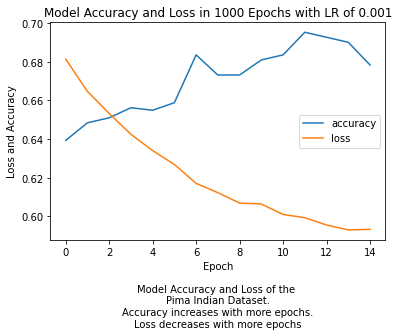

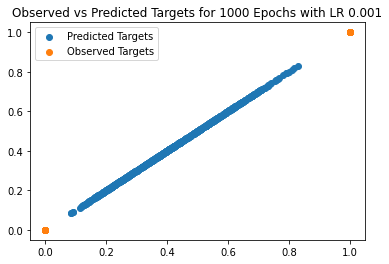

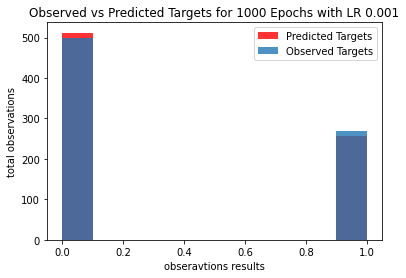

In [4]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.001')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nModel Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.001')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.001")
plt.show()


In [5]:
#run for learning rate 0.5 and 1000 epochs
#reset vars
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None
history = None
model = None

#create model (requires completion)
model = Sequential()
#12 neurons using relu func
model.add(Dense(12, input_dim=8,activation='relu')) 
#8 neurons using relu func
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#single neuron used to produce probability output in range 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 
#compile model (requires completion)
adam = optimizers.Adam(lr=.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#early stopping monitor - keras lib that'll see if model is changing and if not end it
early_stopping_monitor = EarlyStopping(monitor='loss', patience=1)

#fit model (requires completion)
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0, callbacks=[early_stopping_monitor])

#evaluate model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

#accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
      
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)
print('True negatives:',CM[0,0])  #no and predicted no
print('False negatives:',CM[1,0]) #yes but predicted no
print('False positives:',CM[0,1]) #no but predicted yes
print('True positives:',CM[1,1])  #yes and predicted yes
#we want no and pred no, yes and pred yes. no and pred yes is okay for use case but never want yes but pred no

24/24 [==============================] - 1s 5ms/step - loss: 0.5851 - accuracy: 0.6940

accuracy: 69.40%

loss: 58.51%
----------------
Confusion Matrix
----------------
True negatives: 383
False negatives: 118
False positives: 117
True positives: 150


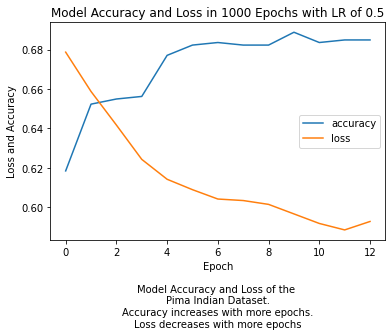

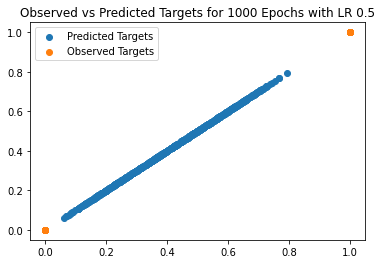

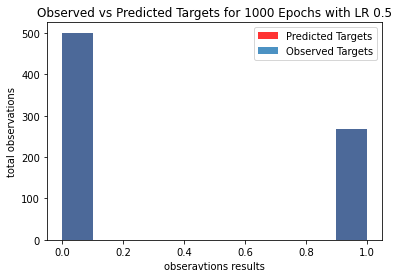

In [6]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.5')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nModel Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.5')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.5")
plt.show()

In [7]:
#run learning rate 0.1 and 1000 epochs
#reset vars 
scores = None 
Y_predict = None
adam = None
rounded = None
y_pred = None 
history = None
model = None

#create model (requires completion)
model = Sequential()
#12 neurons using relu func
model.add(Dense(12, input_dim=8,activation='relu')) 
#8 neurons using relu func
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
#single neuron used to produce probability output range 0 to 1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) 

#compile model 
adam = optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#early stopping monitor - keras lib that'll see if model is changing and if not end it
early_stopping_monitor = EarlyStopping(monitor='loss', patience=1)

#fit model 
history = model.fit(X,Y,epochs=1000,batch_size=10, verbose=0, callbacks=[early_stopping_monitor])

#evaluate model efficiency and performance
scores= model.evaluate(X, Y)
Y_predict= model.predict(X) 

#accuracy and loss
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('----------------')
print('Confusion Matrix')
print('----------------')
CM = confusion_matrix(Y, y_pred)


24/24 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7018

accuracy: 70.18%

loss: 58.72%
----------------
Confusion Matrix
----------------


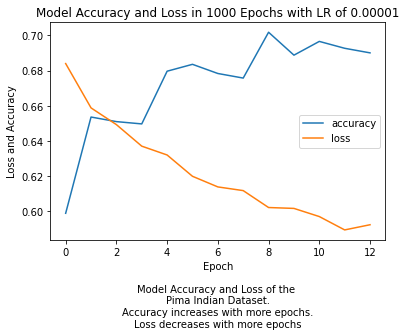

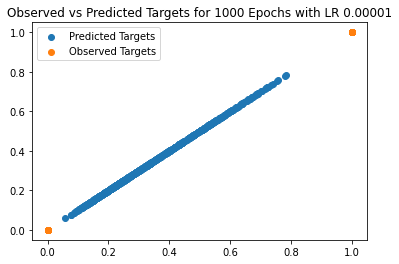

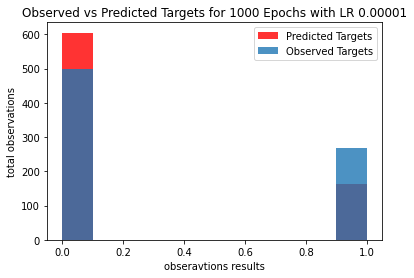

In [8]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss in 1000 Epochs with LR of 0.00001')
plt.ylabel('Loss and Accuracy')
plt.xlabel('Epoch\n\nModel Accuracy and Loss of the \nPima Indian Dataset.\nAccuracy increases with more epochs.\nLoss decreases with more epochs')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()


plt.scatter(Y_predict,Y_predict, label = "Predicted Targets")
plt.scatter(Y,Y, label = "Observed Targets")
plt.legend()
plt.title('Observed vs Predicted Targets for 1000 Epochs with LR 0.00001')
plt.show()

ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.8,label="Predicted Targets",color='red')
ax.legend()
plt.hist(Y,alpha=0.8, label="Observed Targets")
ax.legend()
plt.ylabel("total observations")
plt.xlabel("obseravtions results")
plt.title("Observed vs Predicted Targets for 1000 Epochs with LR 0.00001")
plt.show()